In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()

import numpy as np
import math

In [23]:
def show_heatmaps(df, x, y, z, vmin=0.85, vmax=0.9):
    z_vals = df[z].unique()
    
    if len(z_vals) == 1:
        selection = df.pivot(x, y, 'val_score')
        sns.heatmap(selection, vmin=vmin, vmax=vmax).set_title('{}: {}'.format(z, z_vals[0]))
        return
    
    num_rows = math.ceil(len(z_vals) / 3.)
    f, axes = plt.subplots(num_rows, 3, figsize=(12,num_rows*4))
    plt.subplots_adjust(wspace=1.0, hspace=1.0)
    
    for i in range(num_rows):
        for j in range(3):
            
            if i*3+j > (len(z_vals) - 1):
                break

            z_val = z_vals[i*3+j]
            
            selection = df[df[z] == z_val]

            #print('{}: {}'.format(z, z_val))
            #print(selection[[x, y, 'val_score']].head())
            selection = selection.pivot(x, y, 'val_score')
            
            sns.heatmap(selection, vmin=vmin, vmax=vmax, ax=axes[i,j]).set_title('{}: {}'.format(z, z_val))

In [24]:
def linear(x):
    return x

In [25]:
def show_3d_heatmap(df, x, y, z, x_scale=linear, y_scale=linear, z_scale=linear):
    fig = plt.figure()

    ax = plt.axes(projection='3d')

    # Data for three-dimensional scattered points
    xs = x_scale(df[x].values)
    ys = y_scale(df[y].values)
    zs = z_scale(df[z].values)
    scores = df['val_score'].values
    scatterplot = ax.scatter3D(xs, ys, zs, c=scores, cmap='Reds')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    cbar = ax.figure.colorbar(scatterplot, ax=ax, cmap="Reds")
    cbar.ax.set_ylabel('Validation Score', rotation=-90, va="bottom")

## OPU Degree 2

In [14]:
opu_degree_2 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_sim_opu_2.csv')

In [15]:
opu_degree_2.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
239,10000.000000,4.0,2.0,10000.0,0.204043,opu,1.376995,1.00000,0.8779,0.891000
41,0.100000,0.0,2.0,10000.0,0.186526,opu,1.346217,1.00000,0.8790,0.890167
14,0.000001,2.0,2.0,10000.0,0.289254,opu,1.397045,0.00100,0.8788,0.890083
7,0.000001,1.0,2.0,10000.0,0.251306,opu,1.366873,0.00010,0.8802,0.889500
9,0.000001,1.0,2.0,10000.0,0.291198,opu,1.411635,0.01000,0.8773,0.889333
39,0.100000,0.0,2.0,10000.0,0.188280,opu,1.324692,0.01000,0.8807,0.888500
118,10.000000,1.0,2.0,10000.0,0.254064,opu,1.344877,0.10000,0.8791,0.888417
18,0.000001,4.0,2.0,10000.0,0.206231,opu,1.403293,0.00001,0.8775,0.888333
40,0.100000,0.0,2.0,10000.0,0.181990,opu,1.347717,0.10000,0.8792,0.888250
82,1.000000,1.0,2.0,10000.0,0.184877,opu,1.327129,0.10000,0.8789,0.887750


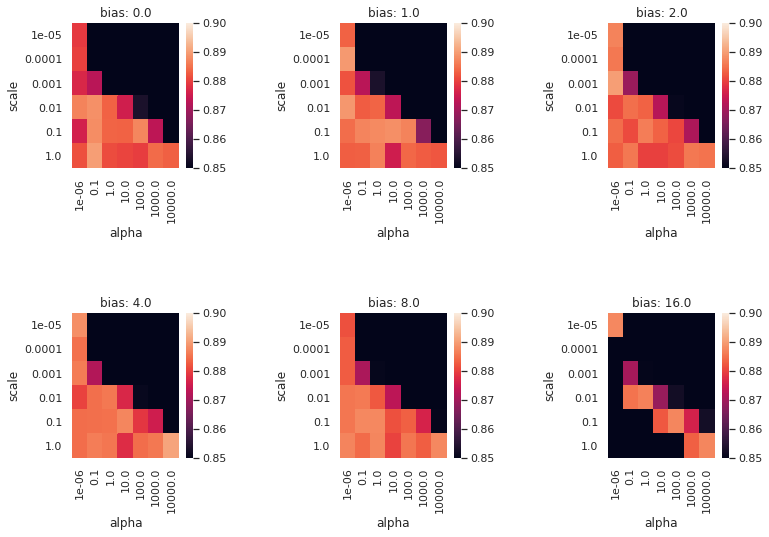

In [7]:
show_heatmaps(opu_degree_2, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)

## OPU Degree 4

In [8]:
opu_degree_4 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_sim_opu_4.csv')

In [9]:
opu_degree_4.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
129,10.000000,16.0,4.0,10000.0,0.255293,opu,1.402319,1.000000e-04,0.8815,0.890667
59,0.100000,16.0,4.0,10000.0,0.251093,opu,1.353732,1.000000e+00,0.8816,0.888417
94,1.000000,16.0,4.0,10000.0,0.186762,opu,1.350705,1.000000e-02,0.8813,0.887750
45,0.100000,1.0,4.0,10000.0,0.184412,opu,1.407829,1.000000e-04,0.8754,0.887667
159,100.000000,4.0,4.0,10000.0,0.184051,opu,1.345986,1.000000e-04,0.8789,0.887667
22,0.000001,16.0,4.0,10000.0,0.185018,opu,1.354008,1.000000e-02,0.8762,0.887417
197,1000.000000,4.0,4.0,10000.0,0.186563,opu,1.351655,1.000000e+00,0.8770,0.887250
20,0.000001,16.0,4.0,10000.0,0.185169,opu,1.350130,1.000000e-06,0.8801,0.887000
190,1000.000000,1.0,4.0,10000.0,0.184295,opu,1.364938,1.000000e-02,0.8764,0.886833
232,10000.000000,4.0,4.0,10000.0,0.183589,opu,1.350311,1.000000e-02,0.8785,0.886667


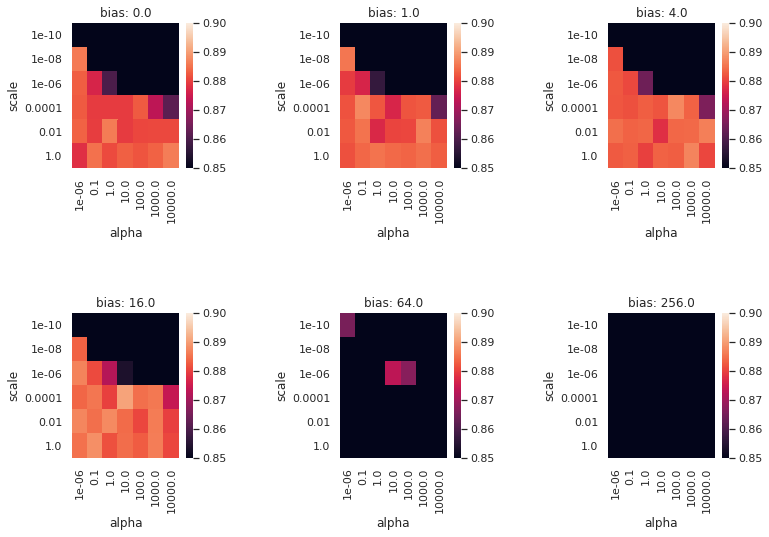

In [10]:
show_heatmaps(opu_degree_4, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)

## OPU Degree 6

In [11]:
opu_degree_6 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_sim_opu_6.csv')

In [12]:
opu_degree_6.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
128,10.000000,64.0,6.0,10000.0,0.184779,opu,1.360892,1.000000e-09,0.8791,0.891333
203,1000.000000,64.0,6.0,10000.0,0.183249,opu,1.364560,1.000000e+00,0.8781,0.890833
19,0.000001,64.0,6.0,10000.0,0.189411,opu,1.360804,1.000000e-12,0.8808,0.888250
131,10.000000,64.0,6.0,10000.0,0.270765,opu,1.383090,1.000000e+00,0.8811,0.888083
93,1.000000,64.0,6.0,10000.0,0.193974,opu,1.339203,1.000000e-06,0.8789,0.886833
58,0.100000,64.0,6.0,10000.0,0.207428,opu,1.333754,1.000000e-03,0.8795,0.886250
95,1.000000,64.0,6.0,10000.0,0.188120,opu,1.344012,1.000000e+00,0.8756,0.886250
20,0.000001,64.0,6.0,10000.0,0.187743,opu,1.340618,1.000000e-09,0.8796,0.886250
231,10000.000000,8.0,6.0,10000.0,0.191921,opu,1.392850,1.000000e-06,0.8757,0.886000
201,1000.000000,64.0,6.0,10000.0,0.187508,opu,1.348340,1.000000e-06,0.8770,0.885667


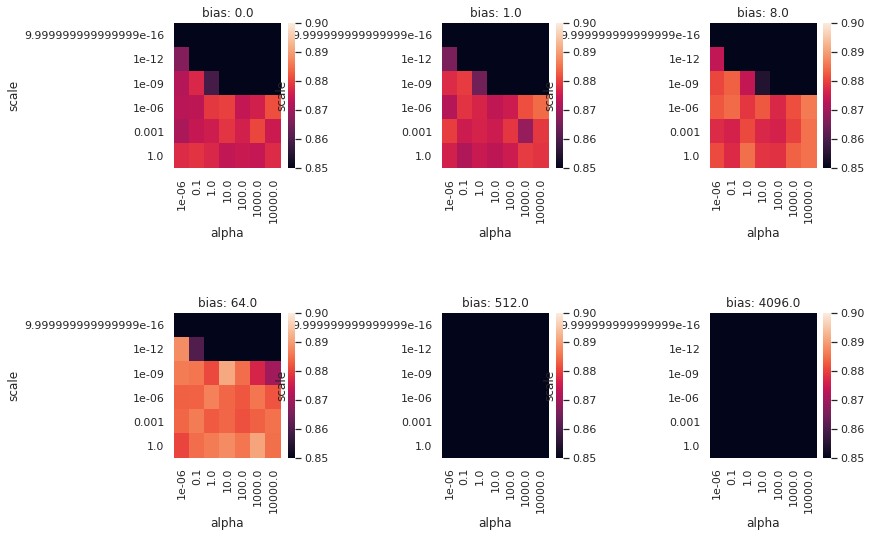

In [13]:
show_heatmaps(opu_degree_6, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)

## RBF

In [43]:
rbf = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_rbf_rff.csv')

In [44]:
rbf.sort_values(by='val_score', ascending=False)[:20]

,alpha,gamma,num_features,proj_time,projection,regr_time,scale,test_score,val_score
25,0.000001,0.003906,10000.0,0.110230,rbf,1.829300,0.01,0.8859,0.894667
188,0.001000,0.003906,10000.0,0.101337,rbf,1.750485,0.10,0.8832,0.894167
358,1.000000,0.007812,10000.0,0.101937,rbf,1.790624,10.00,0.8843,0.893917
231,0.010000,0.000977,10000.0,0.101777,rbf,1.728432,1.00,0.8800,0.893667
303,0.100000,0.007812,10000.0,0.136939,rbf,1.824980,1.00,0.8858,0.892167
412,10.000000,0.007812,10000.0,0.102961,rbf,1.775341,10.00,0.8843,0.892083
76,0.000010,0.001953,10000.0,0.135893,rbf,1.819077,10.00,0.8825,0.891500
85,0.000010,0.007812,10000.0,0.112641,rbf,1.834133,0.01,0.8861,0.891167
191,0.001000,0.003906,10000.0,0.104754,rbf,1.797947,100.00,0.8822,0.891083
143,0.000100,0.007812,10000.0,0.100864,rbf,1.782040,100.00,0.8818,0.890917


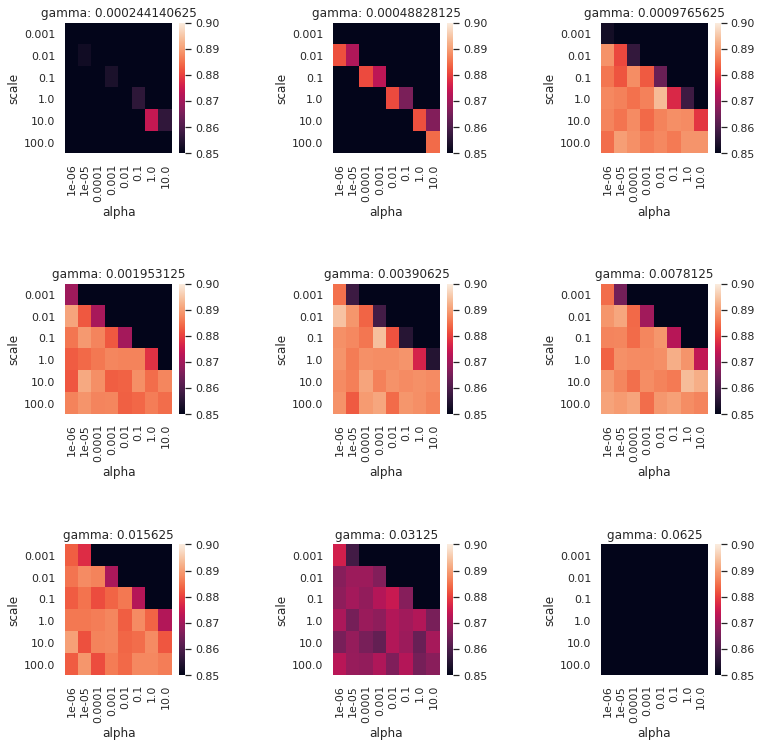

In [45]:
show_heatmaps(rbf, 'scale', 'alpha', 'gamma', vmin=0.85, vmax=0.9)

## Linear

In [5]:
linear = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_linear.csv')

In [6]:
linear.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,num_features,proj_time,projection,regr_time,scale,test_score,val_score
35,0.000001,16.0,10000.0,0.0,linear,0.022552,1.0000,0.8183,0.833083
22,0.000001,4.0,10000.0,0.0,linear,0.045527,0.1000,0.8187,0.832667
27,0.000001,8.0,10000.0,0.0,linear,0.019009,0.0100,0.8176,0.832333
46,0.100000,1.0,10000.0,0.0,linear,0.018403,0.1000,0.8173,0.831750
173,100.000000,8.0,10000.0,0.0,linear,0.019509,1.0000,0.8175,0.831417
19,0.000001,4.0,10000.0,0.0,linear,0.031692,0.0001,0.8163,0.831250
11,0.000001,1.0,10000.0,0.0,linear,0.018245,1.0000,0.8192,0.830583
29,0.000001,8.0,10000.0,0.0,linear,0.020002,1.0000,0.8183,0.830417
101,1.000000,8.0,10000.0,0.0,linear,0.019042,1.0000,0.8199,0.830083
47,0.100000,1.0,10000.0,0.0,linear,0.018377,1.0000,0.8187,0.829750


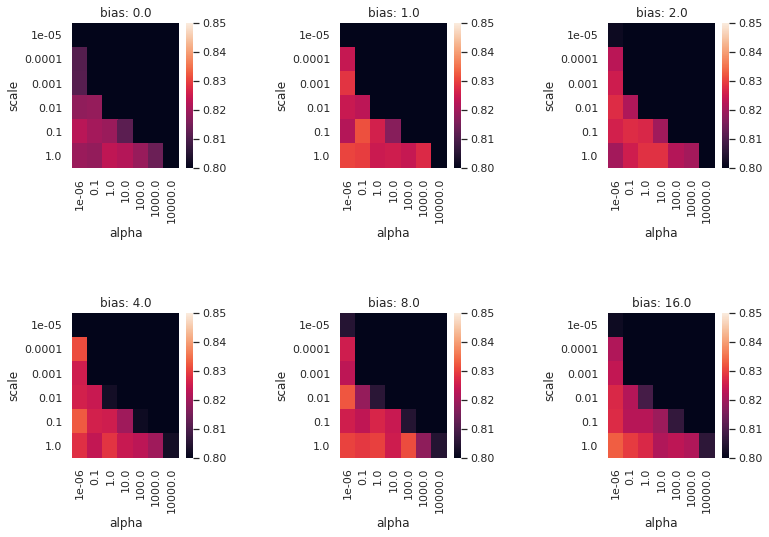

In [7]:
show_heatmaps(linear, 'scale', 'alpha', 'bias', vmin=0.80, vmax=0.85)

## Real OPU Bias 0

In [28]:
opu_degree_2 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_real_opu_2_bias_0.csv')

In [29]:
opu_degree_2.sort_values(by='val_score', ascending=False)

,alpha,bias,num_features,precomputed,proj_time,projection,raw_features,regr_time,scale,test_score,val_score
41,10000.000000,0.0,10000.0,1.0,10.070994,opu_physical,0.0,16.146359,1.00000,0.8685,0.877583
0,0.000001,0.0,10000.0,1.0,9.342507,opu_physical,0.0,16.343139,0.00001,0.8689,0.873500
15,1.000000,0.0,10000.0,1.0,9.432601,opu_physical,0.0,15.685265,0.01000,0.8672,0.870583
8,0.100000,0.0,10000.0,1.0,9.556238,opu_physical,0.0,16.664476,0.00100,0.8509,0.860167
21,10.000000,0.0,10000.0,1.0,9.466932,opu_physical,0.0,16.839272,0.01000,0.8525,0.858000
34,1000.000000,0.0,10000.0,1.0,10.141982,opu_physical,0.0,18.206746,0.10000,0.8512,0.856417
27,100.000000,0.0,10000.0,1.0,9.536008,opu_physical,0.0,15.913627,0.01000,0.8215,0.829667
14,1.000000,0.0,10000.0,1.0,9.585912,opu_physical,0.0,16.014477,0.00100,0.8215,0.829583
40,10000.000000,0.0,10000.0,1.0,10.956789,opu_physical,0.0,17.400605,0.10000,0.8220,0.829250
7,0.100000,0.0,10000.0,1.0,9.545529,opu_physical,0.0,16.205800,0.00010,0.7716,0.784667


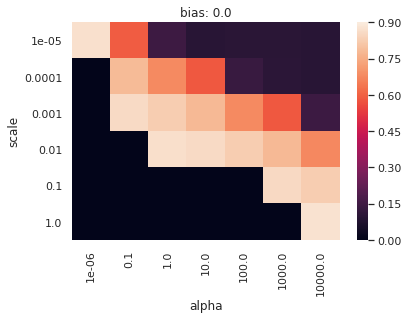

In [30]:
show_heatmaps(opu_degree_2, 'scale', 'alpha', 'bias', vmin=0.0, vmax=0.9)
# => we need stronger regularization for the physical device! otherwise, cholesky does not succeed!
# this may be due to the truncated feature spectrum! (quantization)

## Real OPU Bias 1

In [31]:
opu_degree_2 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_real_opu_2_bias_1.csv')

In [32]:
opu_degree_2.sort_values(by='val_score', ascending=False)

,alpha,bias,num_features,precomputed,proj_time,projection,raw_features,regr_time,scale,test_score,val_score
0,0.000001,0.0,10000.0,1.0,8.929997,opu_physical,0.0,52.734060,0.00001,0.8663,0.875167
15,1.000000,0.0,10000.0,1.0,9.627982,opu_physical,0.0,16.924360,0.01000,0.8681,0.874333
41,10000.000000,0.0,10000.0,1.0,9.281833,opu_physical,0.0,19.313406,1.00000,0.8685,0.873583
21,10.000000,0.0,10000.0,1.0,9.239523,opu_physical,0.0,16.437345,0.01000,0.8508,0.863333
8,0.100000,0.0,10000.0,1.0,9.080260,opu_physical,0.0,14.932213,0.00100,0.8515,0.861333
34,1000.000000,0.0,10000.0,1.0,9.506219,opu_physical,0.0,15.790400,0.10000,0.8505,0.858750
27,100.000000,0.0,10000.0,1.0,9.104566,opu_physical,0.0,17.809711,0.01000,0.8191,0.828583
40,10000.000000,0.0,10000.0,1.0,9.927514,opu_physical,0.0,17.685356,0.10000,0.8195,0.827667
14,1.000000,0.0,10000.0,1.0,9.679773,opu_physical,0.0,15.396258,0.00100,0.8207,0.825000
20,10.000000,0.0,10000.0,1.0,9.716641,opu_physical,0.0,15.336151,0.00100,0.7763,0.791333


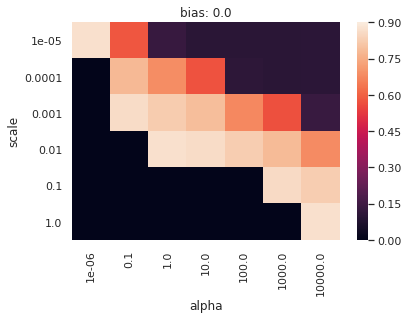

In [33]:
show_heatmaps(opu_degree_2, 'scale', 'alpha', 'bias', vmin=0.0, vmax=0.9)
# => we need stronger regularization for the physical device! otherwise, cholesky does not succeed!
# this may be due to the truncated feature spectrum! (quantization)

## Real OPU Bias 16

In [34]:
opu_degree_2 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_real_opu_2_bias_4.csv')

In [35]:
opu_degree_2.sort_values(by='val_score', ascending=False)

,alpha,bias,num_features,precomputed,proj_time,projection,raw_features,regr_time,scale,test_score,val_score
41,10000.000000,0.0,10000.0,1.0,10.516236,opu_physical,0.0,13.902066,1.00000,0.8676,0.878583
28,100.000000,0.0,10000.0,1.0,9.759787,opu_physical,0.0,13.992014,0.10000,0.8659,0.877000
0,0.000001,0.0,10000.0,1.0,8.741254,opu_physical,0.0,20.569092,0.00001,0.8670,0.876917
15,1.000000,0.0,10000.0,1.0,9.472554,opu_physical,0.0,12.659407,0.01000,0.8677,0.875917
21,10.000000,0.0,10000.0,1.0,9.648448,opu_physical,0.0,12.284010,0.01000,0.8513,0.859000
34,1000.000000,0.0,10000.0,1.0,9.827429,opu_physical,0.0,14.237498,0.10000,0.8506,0.858500
8,0.100000,0.0,10000.0,1.0,9.725082,opu_physical,0.0,12.815542,0.00100,0.8499,0.855500
40,10000.000000,0.0,10000.0,1.0,9.669553,opu_physical,0.0,13.326189,0.10000,0.8186,0.826667
27,100.000000,0.0,10000.0,1.0,9.342937,opu_physical,0.0,11.609123,0.01000,0.8193,0.826167
14,1.000000,0.0,10000.0,1.0,9.728128,opu_physical,0.0,15.236257,0.00100,0.8191,0.825417


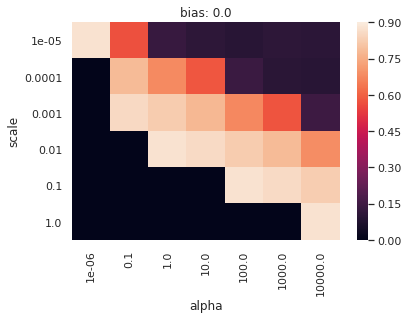

In [36]:
show_heatmaps(opu_degree_2, 'scale', 'alpha', 'bias', vmin=0.0, vmax=0.9)
# => we need stronger regularization for the physical device! otherwise, cholesky does not succeed!
# this may be due to the truncated feature spectrum! (quantization)